# K Means Iterations

For each iteration, display the classifier label for each point, the region (convex hull) for each label, and where the next centroid will be.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from scipy.spatial import ConvexHull
%matplotlib inline

def kmeans_iter_graph (point_list=[], *arg, k):
    # combine the lists
    points = np.concatenate([p for p in point_list])
    colors = ['b', 'g', 'r', 'y', 'm', 'k', 'c']
    
    # select k random points
    centroids = np.random.uniform(np.min(points[:,0]),np.max(points[:,1]),(k,2))
    
    plt.figure (figsize=(8,8))
    plt.plot(points[:,0], points[:,1], 'bo')
    plt.plot(centroids[:,0],centroids[:,1],'r*',markersize=20)
    plt.title('Initial Random Centroids')

    old_centroids = []
    counter = 0
    
    while not np.array_equal(centroids,old_centroids):
        # for each point in points, get the distance from each centroid and find
        # the nearest centroid.
        counter+=1
        old_centroids = centroids

        distances = [[linalg.norm(point-centroids[j]) for j in range(k)] for point in points]
        labels = np.asarray([np.argmin(distances[i]) for i in range(len(points))])

        # now get the new centroids from each label group
        centroids = []
        
        plt.figure(figsize=(8,8))
        plt.title('Iteration #'+str(counter))
        for i in range(k):
            # Do mean of each dimension separately...
            current_points = points[np.where(labels==i)]
            hull=ConvexHull(current_points)
            centroids.append([np.mean(current_points[:,0]),np.mean(np.mean(current_points[:,1]))])
            plt.plot(current_points[:,0],current_points[:,1], '%so'%colors[i],alpha=0.2)
            plt.plot(centroids[i][0],centroids[i][1], '%s*'%colors[i], markersize=20)
            plt.plot(old_centroids[i][0],old_centroids[i][1], '%s*'%colors[i], markersize=20, alpha=0.3)
            plt.plot([centroids[i][0],old_centroids[i][0]],[centroids[i][1],old_centroids[i][1]], '%s-'%colors[i], alpha=1.0)
            for simplex in hull.simplices:
                plt.plot(current_points[simplex,0],current_points[simplex,1], '%s--'%colors[i],alpha=0.3)
            plt.title('Iteration ' + str(counter))

    print('Final Centroid Coordinates:')
    print(centroids)

Try it with 3 randomly generated regions centered around (0,0), (5,5) and (10,10)

In [2]:
points1 = np.random.standard_normal((100,2))
points2 = np.random.normal(10,2,(100,2))
points3 = np.random.normal(5,2,(100,2))
point_list = [points1,points2,points3]

Final Centroid Coordinates:
[[0.31486156377432761, 0.048412857962843996], [9.8251498915623561, 10.10104615659796], [5.0809116474265643, 4.8227519243044679]]


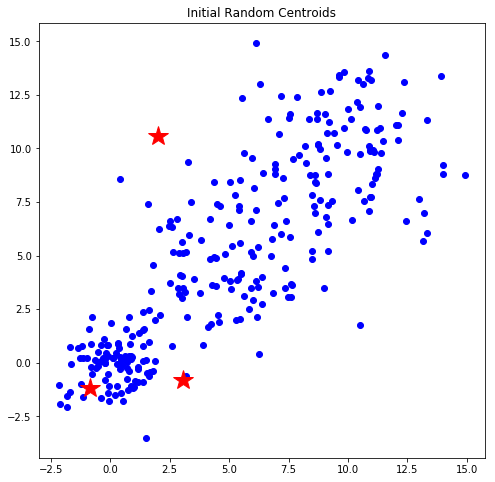

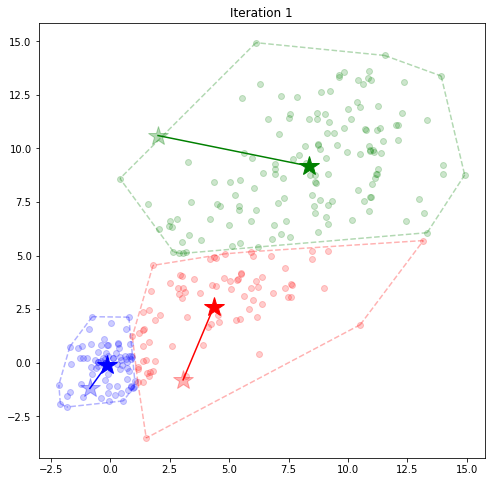

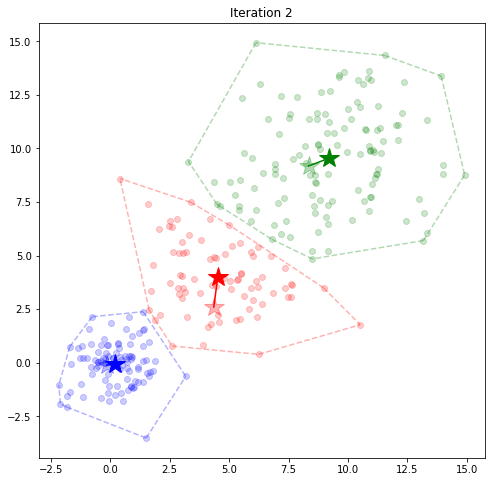

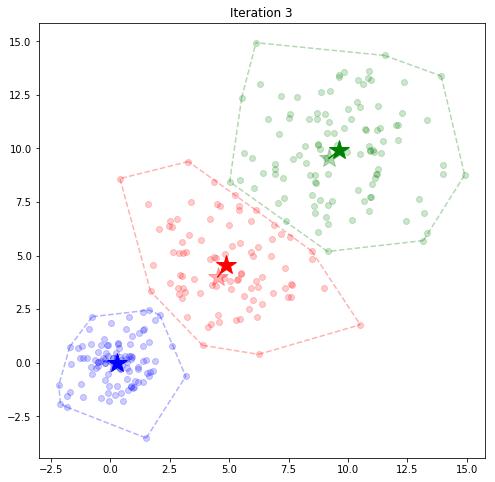

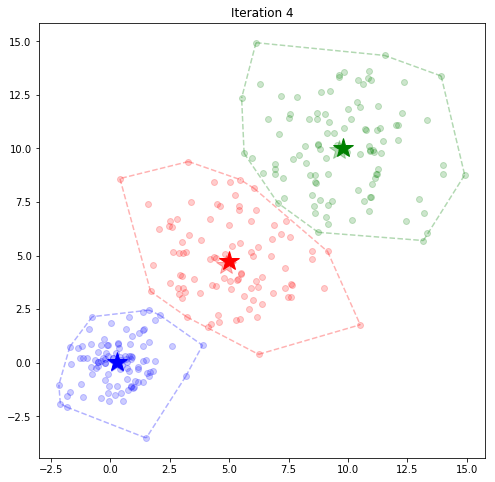

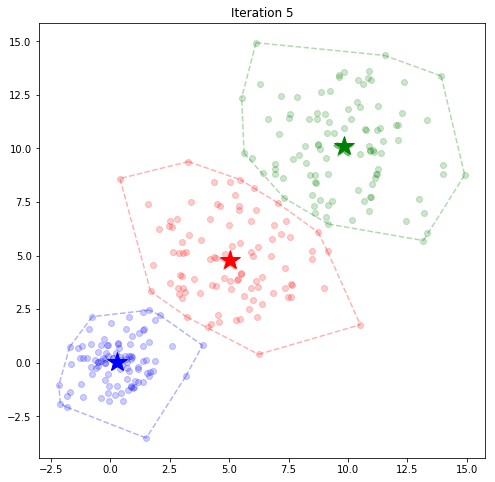

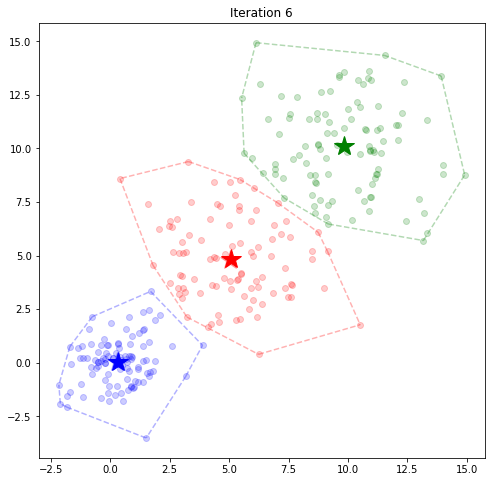

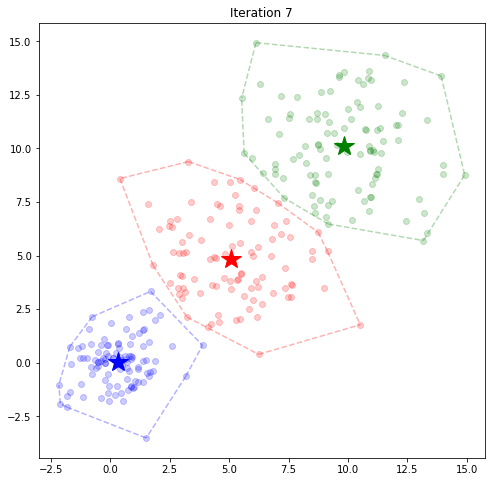

In [3]:
kmeans_iter_graph(point_list,k=3)

Four regions around (5,5), (10,10), (15,15), and (20,20) with a bunch of extra noise centered on (12.5,12.5). Let's see if KMeans converges towards the four regions.

In [4]:
p1 = np.random.normal(5,2,(100,2))
p2 = np.random.normal(10,2,(100,2))
p3 = np.random.normal(15,2,(100,2))
p4 = np.random.normal(20,2,(100,2))
p5 = np.random.normal(12.5,5,(50,2))
pl2 = [p1,p2,p3,p4,p5]

Final Centroid Coordinates:
[[14.821857071753888, 14.857055728723065], [5.1101829069697757, 4.9023300378953225], [10.256149214479114, 10.123918947604134], [20.255398536709393, 19.719231546635793]]


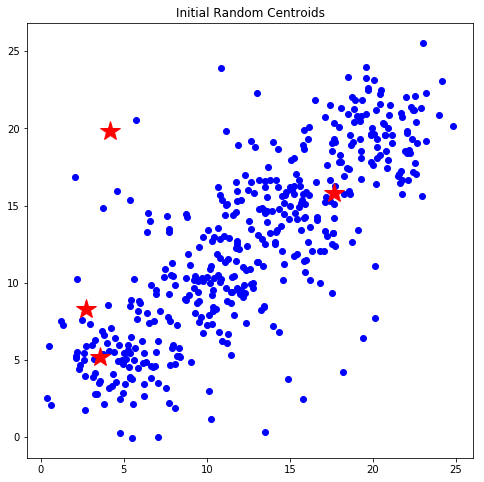

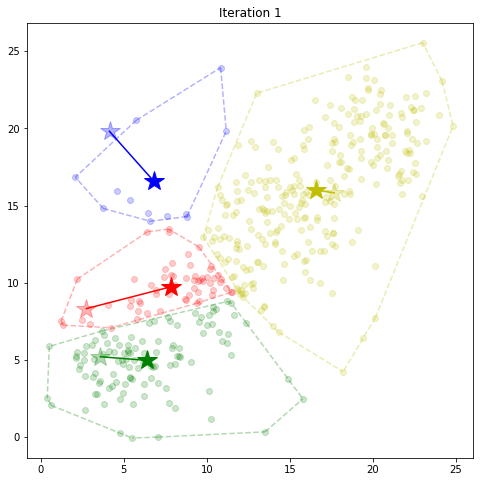

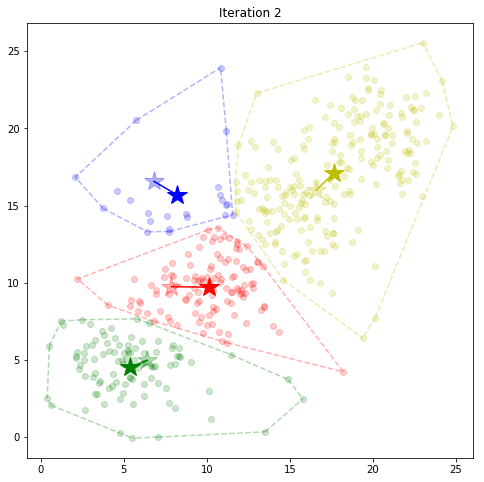

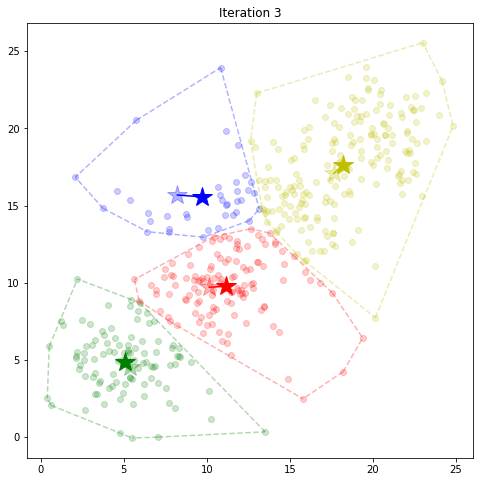

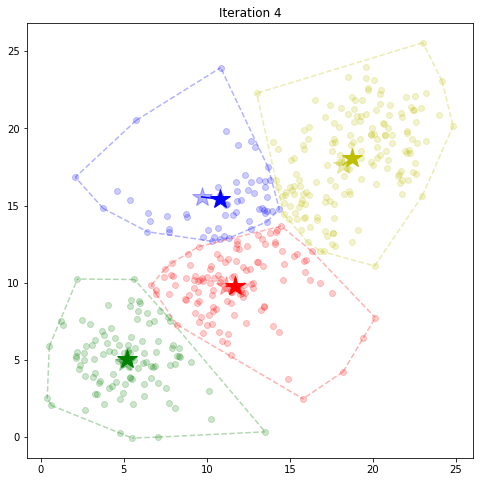

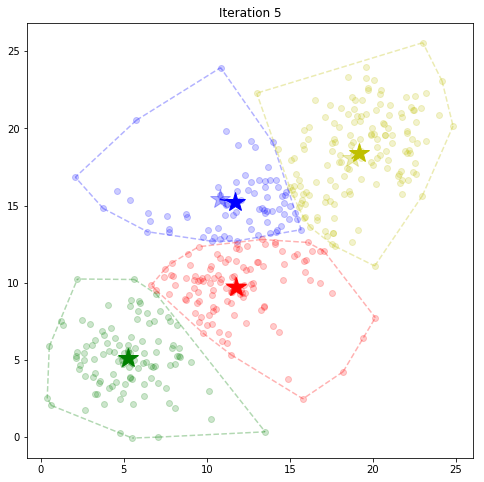

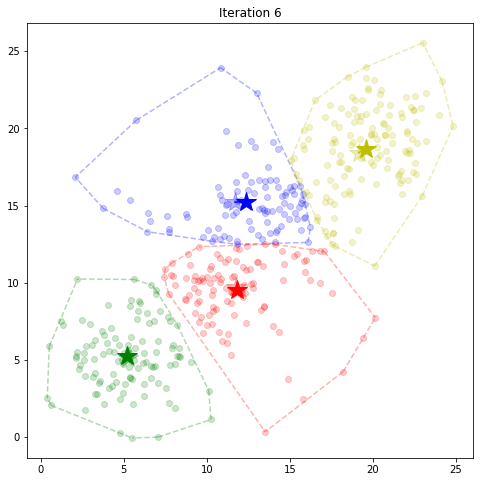

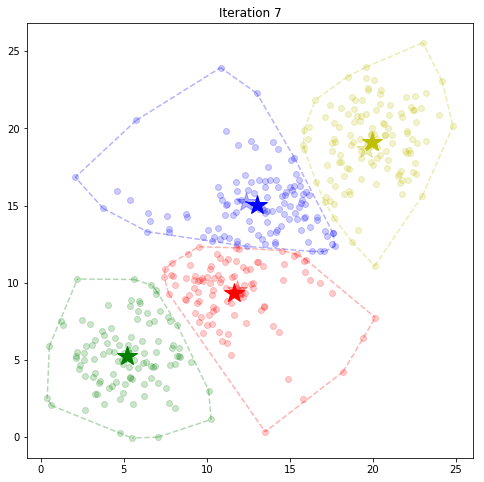

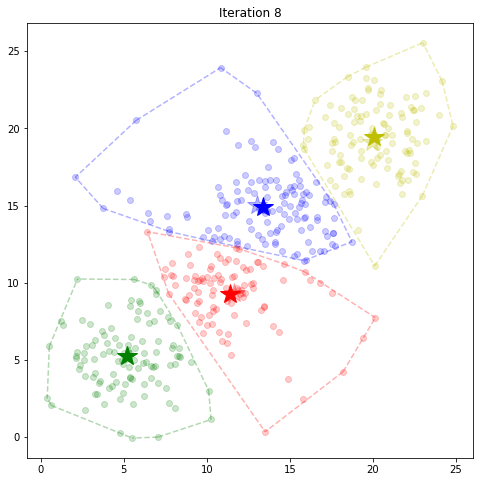

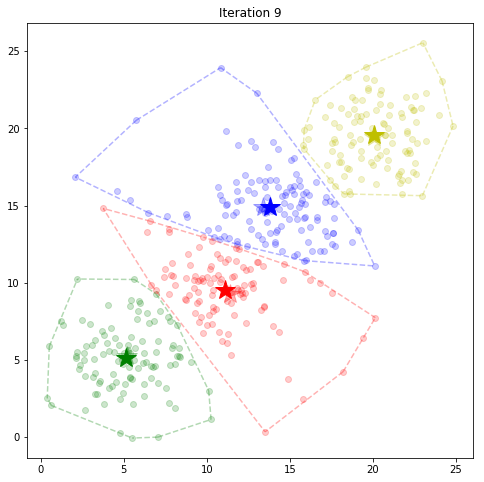

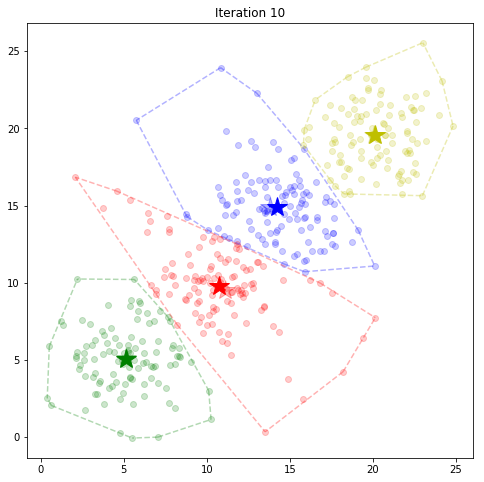

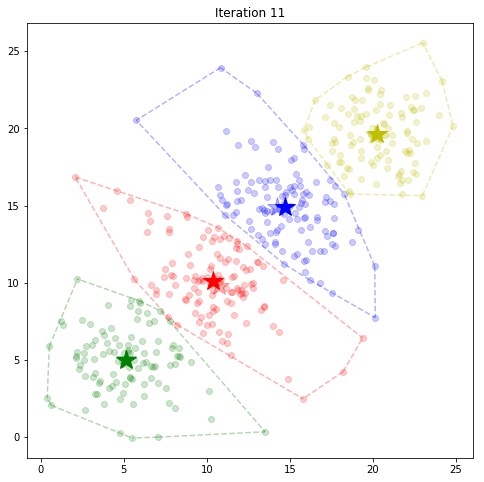

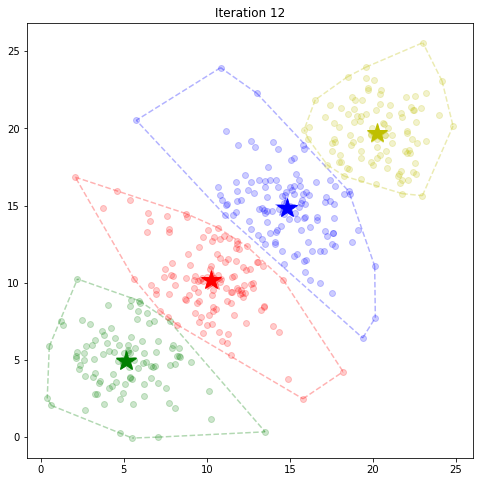

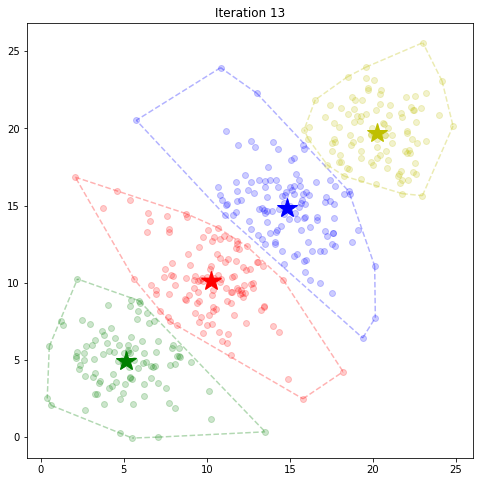

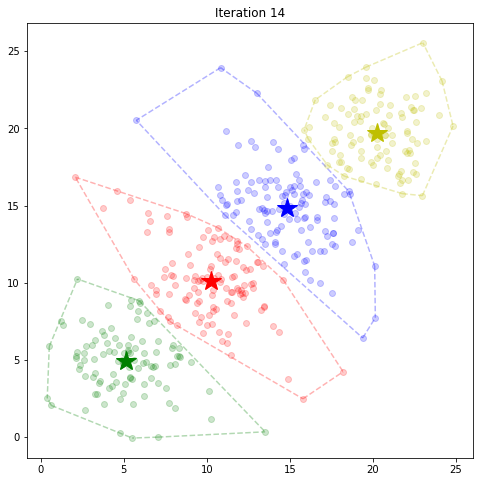

In [5]:
kmeans_iter_graph(pl2,k=4)

Now for centroids not on the 45 degree line... (5,8), (7,15), (15,5), (20,11) plus some noise

In [6]:
pp1 = np.concatenate((np.random.normal(5,2,(100,1)),np.random.normal(8,2,(100,1))),axis=1)
pp2 = np.concatenate((np.random.normal(7,2,(100,1)),np.random.normal(15,2,(100,1))),axis=1)
pp3 = np.concatenate((np.random.normal(15,2,(100,1)),np.random.normal(5,2,(100,1))),axis=1)
pp4 = np.concatenate((np.random.normal(20,2,(100,1)),np.random.normal(11,2,(100,1))),axis=1)
pp5 = np.random.uniform(0,25,(250,2))
pl3 = [pp1,pp2,pp3,pp4,pp5]

Final Centroid Coordinates:
[[19.824300036060212, 12.403965126041392], [5.4274083269280355, 7.8491922775244234], [15.674461219391958, 4.6573569415516305], [7.0648769707226453, 17.116791399433783]]


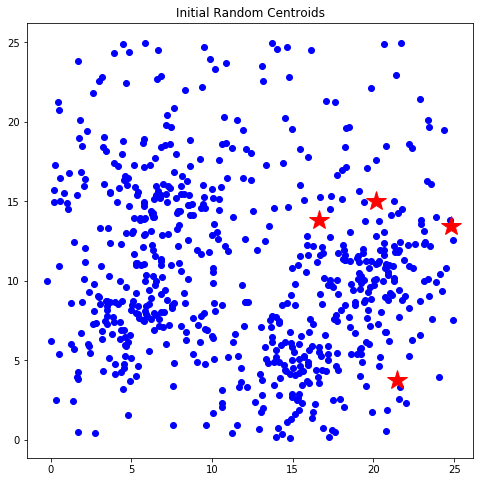

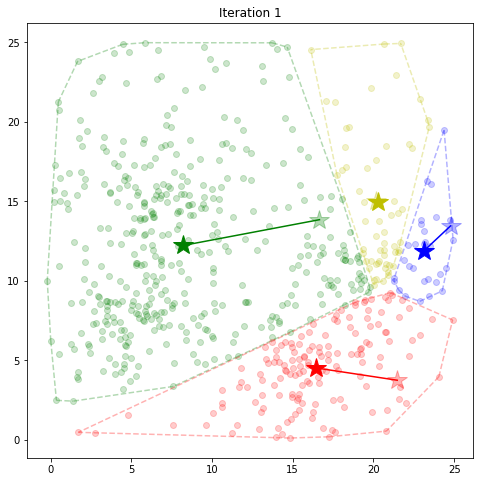

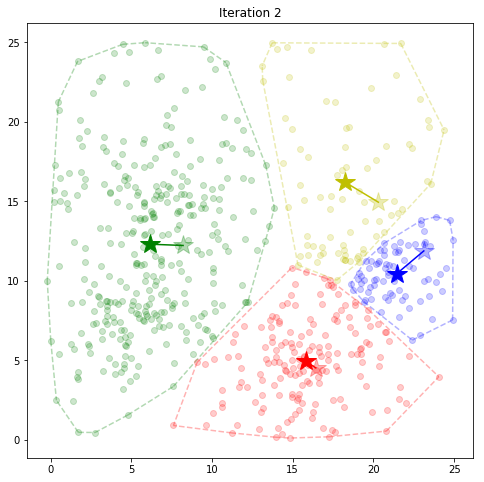

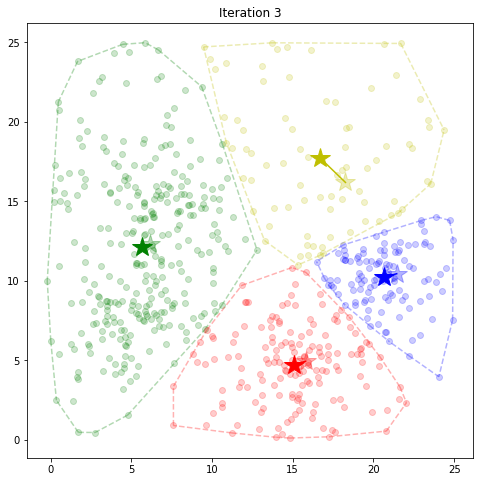

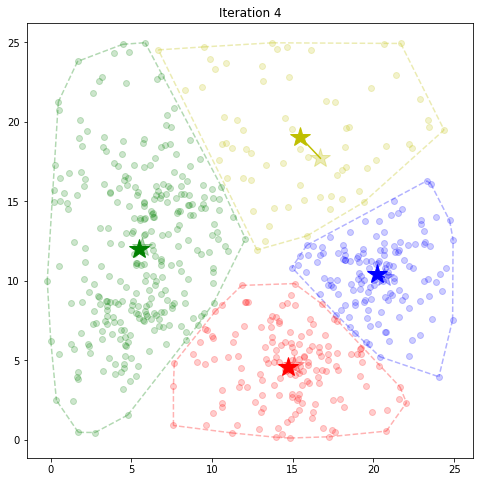

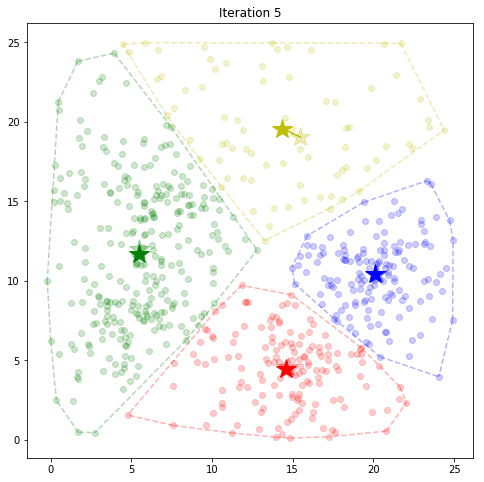

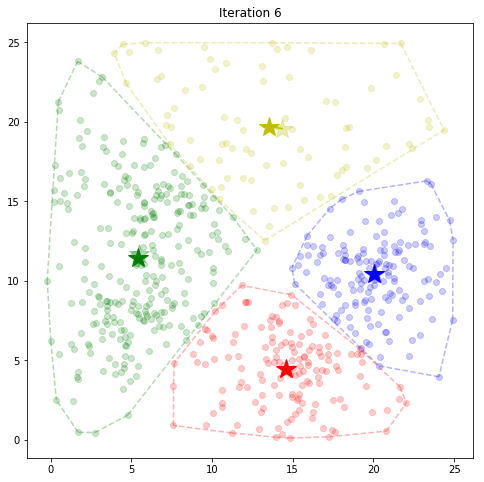

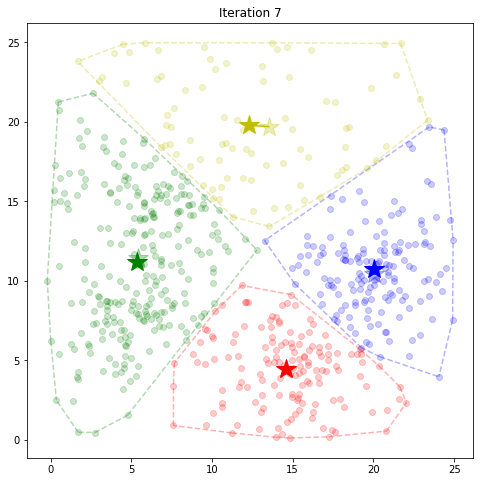

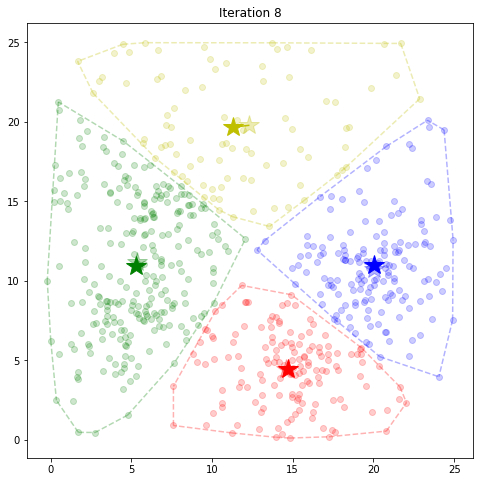

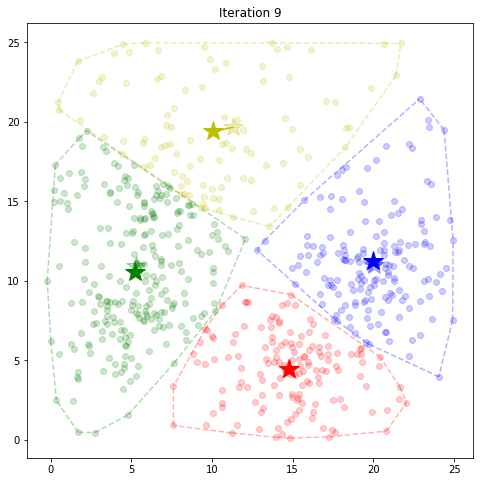

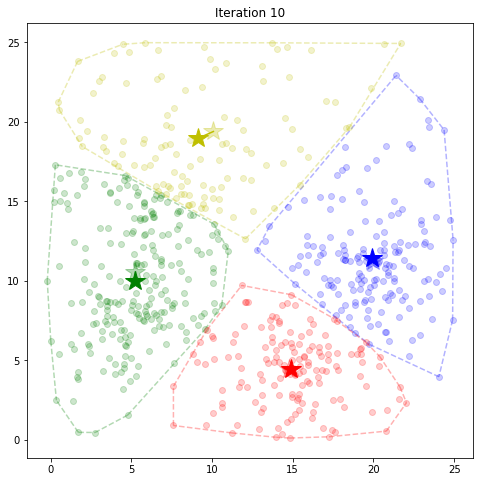

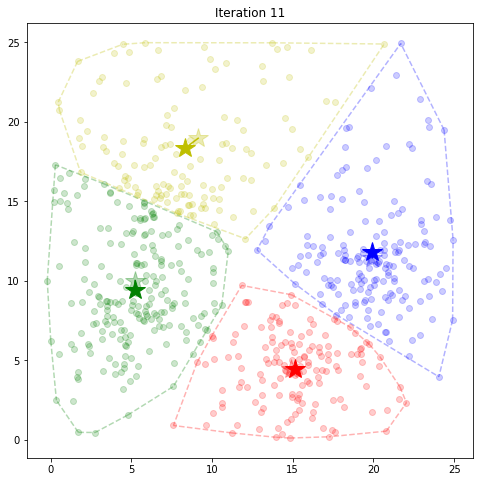

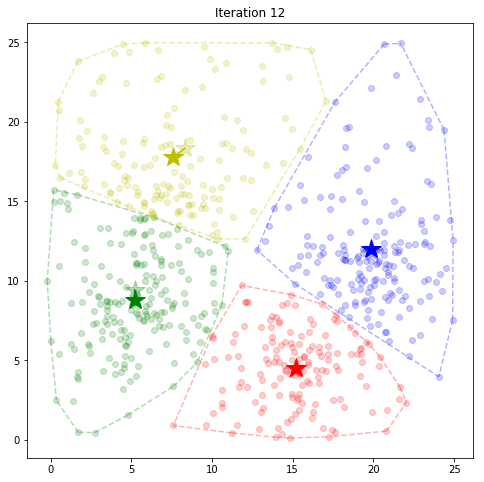

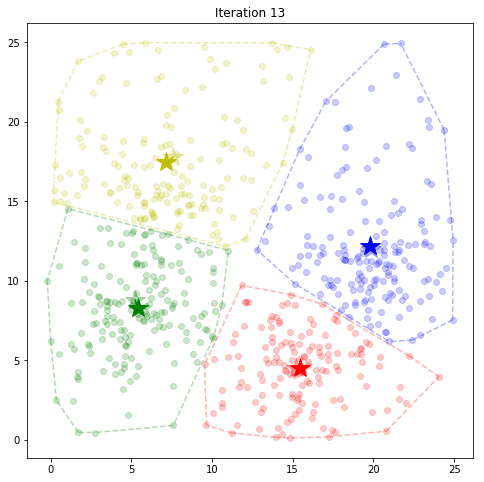

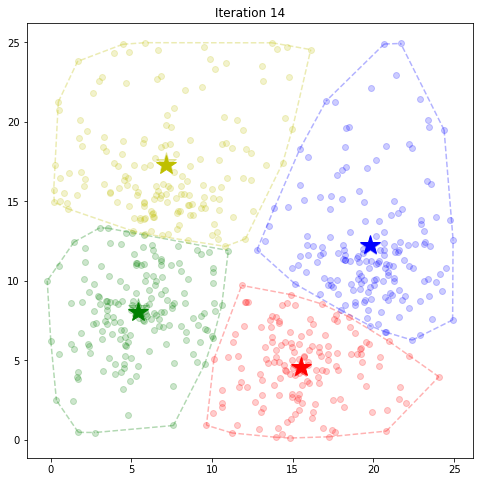

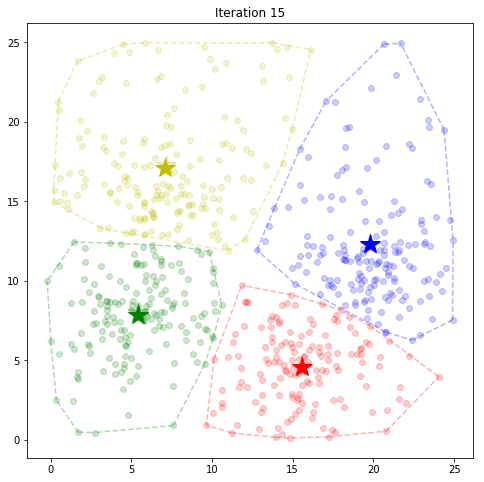

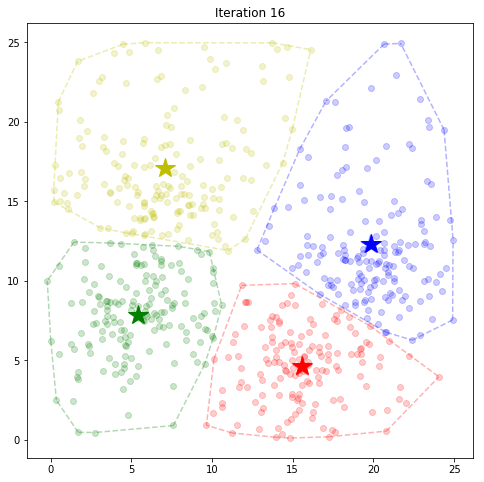

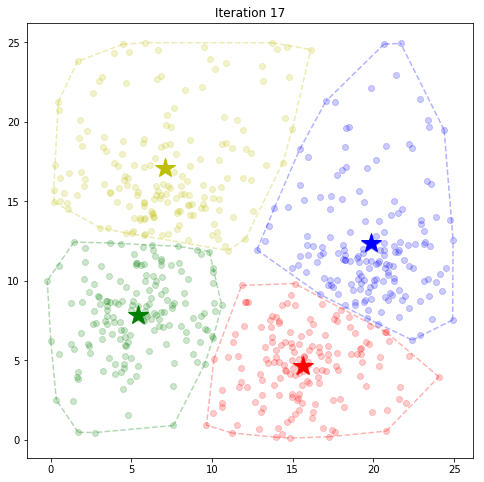

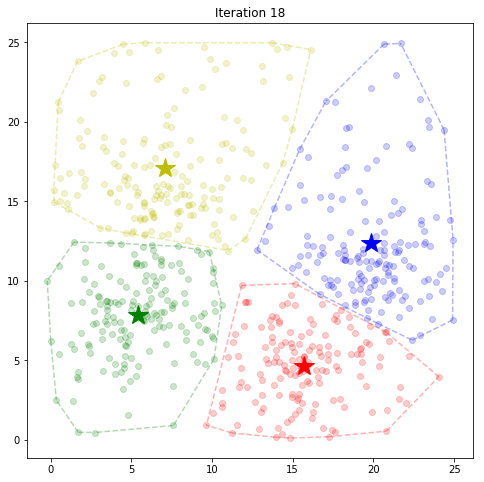

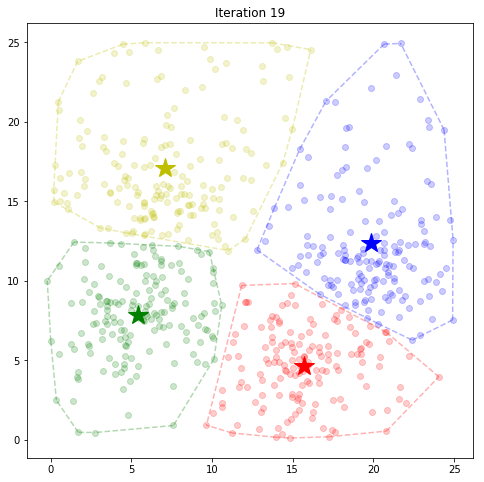

In [7]:
kmeans_iter_graph(pl3,k=4)